In [ ]:
# To import all the basic libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

Install the required version of libraries 

In [ ]:
# !pip install opencv_python==4.1.2.30
# !pip install numpy==1.18.1
# !pip install imutils==0.5.3
# !pip install Keras==2.3.1

To extra dataset if required

In [ ]:
# from zipfile import ZipFile
# file_name = "/content/drive/My Drive/asl_alphabet_train.zip"
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print("Done")

Initialzing variables and setting path

In [ ]:
inputsize_x = 200
inputsize_y = 200
num_classes = 28
epoch = 5
values = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','del','space']
train = '/content/asl_alphabet_train'

Code for One Hot Encoding used to label data 

In [ ]:
def one_hot_code(label):
    index=values.index(label)
    temp=[]
    for i in range(0,len(values)):
        if i==index:
            temp.append(1)
        else:
            temp.append(0)
    return temp

To read images, apply canny edge detection and label the data 

In [ ]:
def data_label(train_path):
    train_img=[]
    for folder in os.listdir(train_path):
        try:
            for name in os.listdir(train_path+'/'+folder):
                loca=train_path+'/'+folder+'/'+name
                img=cv2.imread(loca,cv2.IMREAD_GRAYSCALE)
                #If u dont want to use Canny Preprocessing u can remove next line
                img = cv2.Canny(img,100,200)
                img=cv2.resize(img,(inputsize_x,inputsize_y))
                train_img.append([np.array(img),one_hot_code(folder)])
        except:
            print("Error")
        print("Folder name :",folder)
    return train_img

Converting image to array and splitting the data 

In [ ]:
training_images=data_label(train)
tr_img_data = np.array([i[0] for i in training_images]).reshape(-1,inputsize_x,inputsize_y,1)
tr_lbl_data = np.array([i[1] for i in training_images])
tr_img_data, tst_img_data, tr_lbl_data, tst_lbl_data = train_test_split(tr_img_data, tr_lbl_data, test_size=0.2, random_state=1)

Folder name : X
Folder name : R
Folder name : A
Folder name : S
Folder name : O
Folder name : B
Folder name : T
Folder name : E
Folder name : del
Folder name : V
Folder name : D
Error
Folder name : .DS_Store
Folder name : L
Folder name : M
Folder name : Y
Folder name : H
Folder name : I
Folder name : G
Folder name : W
Folder name : Z
Folder name : space
Folder name : F
Folder name : J
Folder name : U
Folder name : Q
Folder name : P
Folder name : N
Folder name : K
Folder name : C


Initialising the CNN model and compiling it

In [ ]:
import tensorflow 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
%tensorflow_version 1.x
model = Sequential()
input_shape = (inputsize_x, inputsize_y, 1)
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adadelta(), metrics=['accuracy'])
model.summary()
# model.fit(tr_img_data, tr_lbl_data, batch_size=8, epochs=epoch, verbose=1)

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 32)      4128      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 32)        4128      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
___________________________________________

Fitting the training dataset to the model

In [ ]:
history = model.fit(tr_img_data, tr_lbl_data, epochs=epoch, batch_size=8, validation_split=0.2)

Train on 43008 samples, validate on 10752 samples
Epoch 1/5
43008/43008 [==============================] - 59s 1ms/step - loss: 1.1685 - accuracy: 0.6403 - val_loss: 0.3289 - val_accuracy: 0.8829
Epoch 2/5
43008/43008 [==============================] - 52s 1ms/step - loss: 0.4135 - accuracy: 0.8568 - val_loss: 0.2225 - val_accuracy: 0.9238
Epoch 3/5
43008/43008 [==============================] - 53s 1ms/step - loss: 0.2794 - accuracy: 0.9039 - val_loss: 0.1430 - val_accuracy: 0.9504
Epoch 4/5
43008/43008 [==============================] - 53s 1ms/step - loss: 0.2228 - accuracy: 0.9249 - val_loss: 0.1583 - val_accuracy: 0.9468
Epoch 5/5
43008/43008 [==============================] - 53s 1ms/step - loss: 0.2003 - accuracy: 0.9346 - val_loss: 0.1189 - val_accuracy: 0.9604


Saving the Trained Model

In [ ]:
model.save('Model_Epoch_5.h5')

Evaluating model on test dataset

In [ ]:
score = model.evaluate(tst_img_data,tst_lbl_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

13440/13440 [==============================] - 4s 261us/step
Test loss: 0.11696809752888623
Test accuracy: 0.9604910612106323


To plot Training and Validation Loss and accuracy 

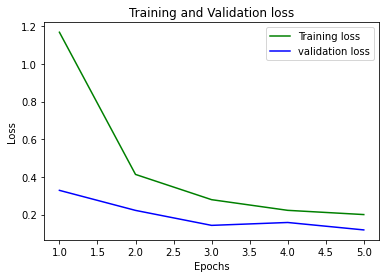

In [ ]:
import matplotlib.pyplot as plt
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,epoch+1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

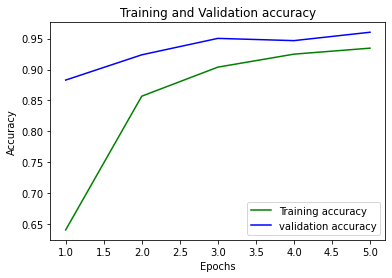

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,epoch+1)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict_classes(tst_img_data)

In [ ]:
rounded_labels=np.argmax(tst_lbl_data, axis=1)
rounded_labels[1]

8

Code to draw heat map for confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (50, 50))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    plt.savefig('10epoch.png')

Print precision and Confusion Matrix

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       588
           1       0.96      0.99      0.98       607
           2       1.00      0.99      1.00       576
           3       0.99      0.98      0.99       606
           4       0.98      0.99      0.98       636
           5       1.00      0.99      0.99       613
           6       0.99      0.99      0.99       634
           7       0.99      0.99      0.99       645
           8       0.99      0.98      0.99       578
           9       0.99      0.99      0.99       582
          10       0.99      0.99      0.99       606
          11       1.00      1.00      1.00       621
          12       0.93      0.99      0.96       587
          13       1.00      0.94      0.97       598
          14       0.99      0.97      0.98       589
          15       0.99      0.99      0.99       602
          16       1.00      0.99      0.99       640
          17       0.98    

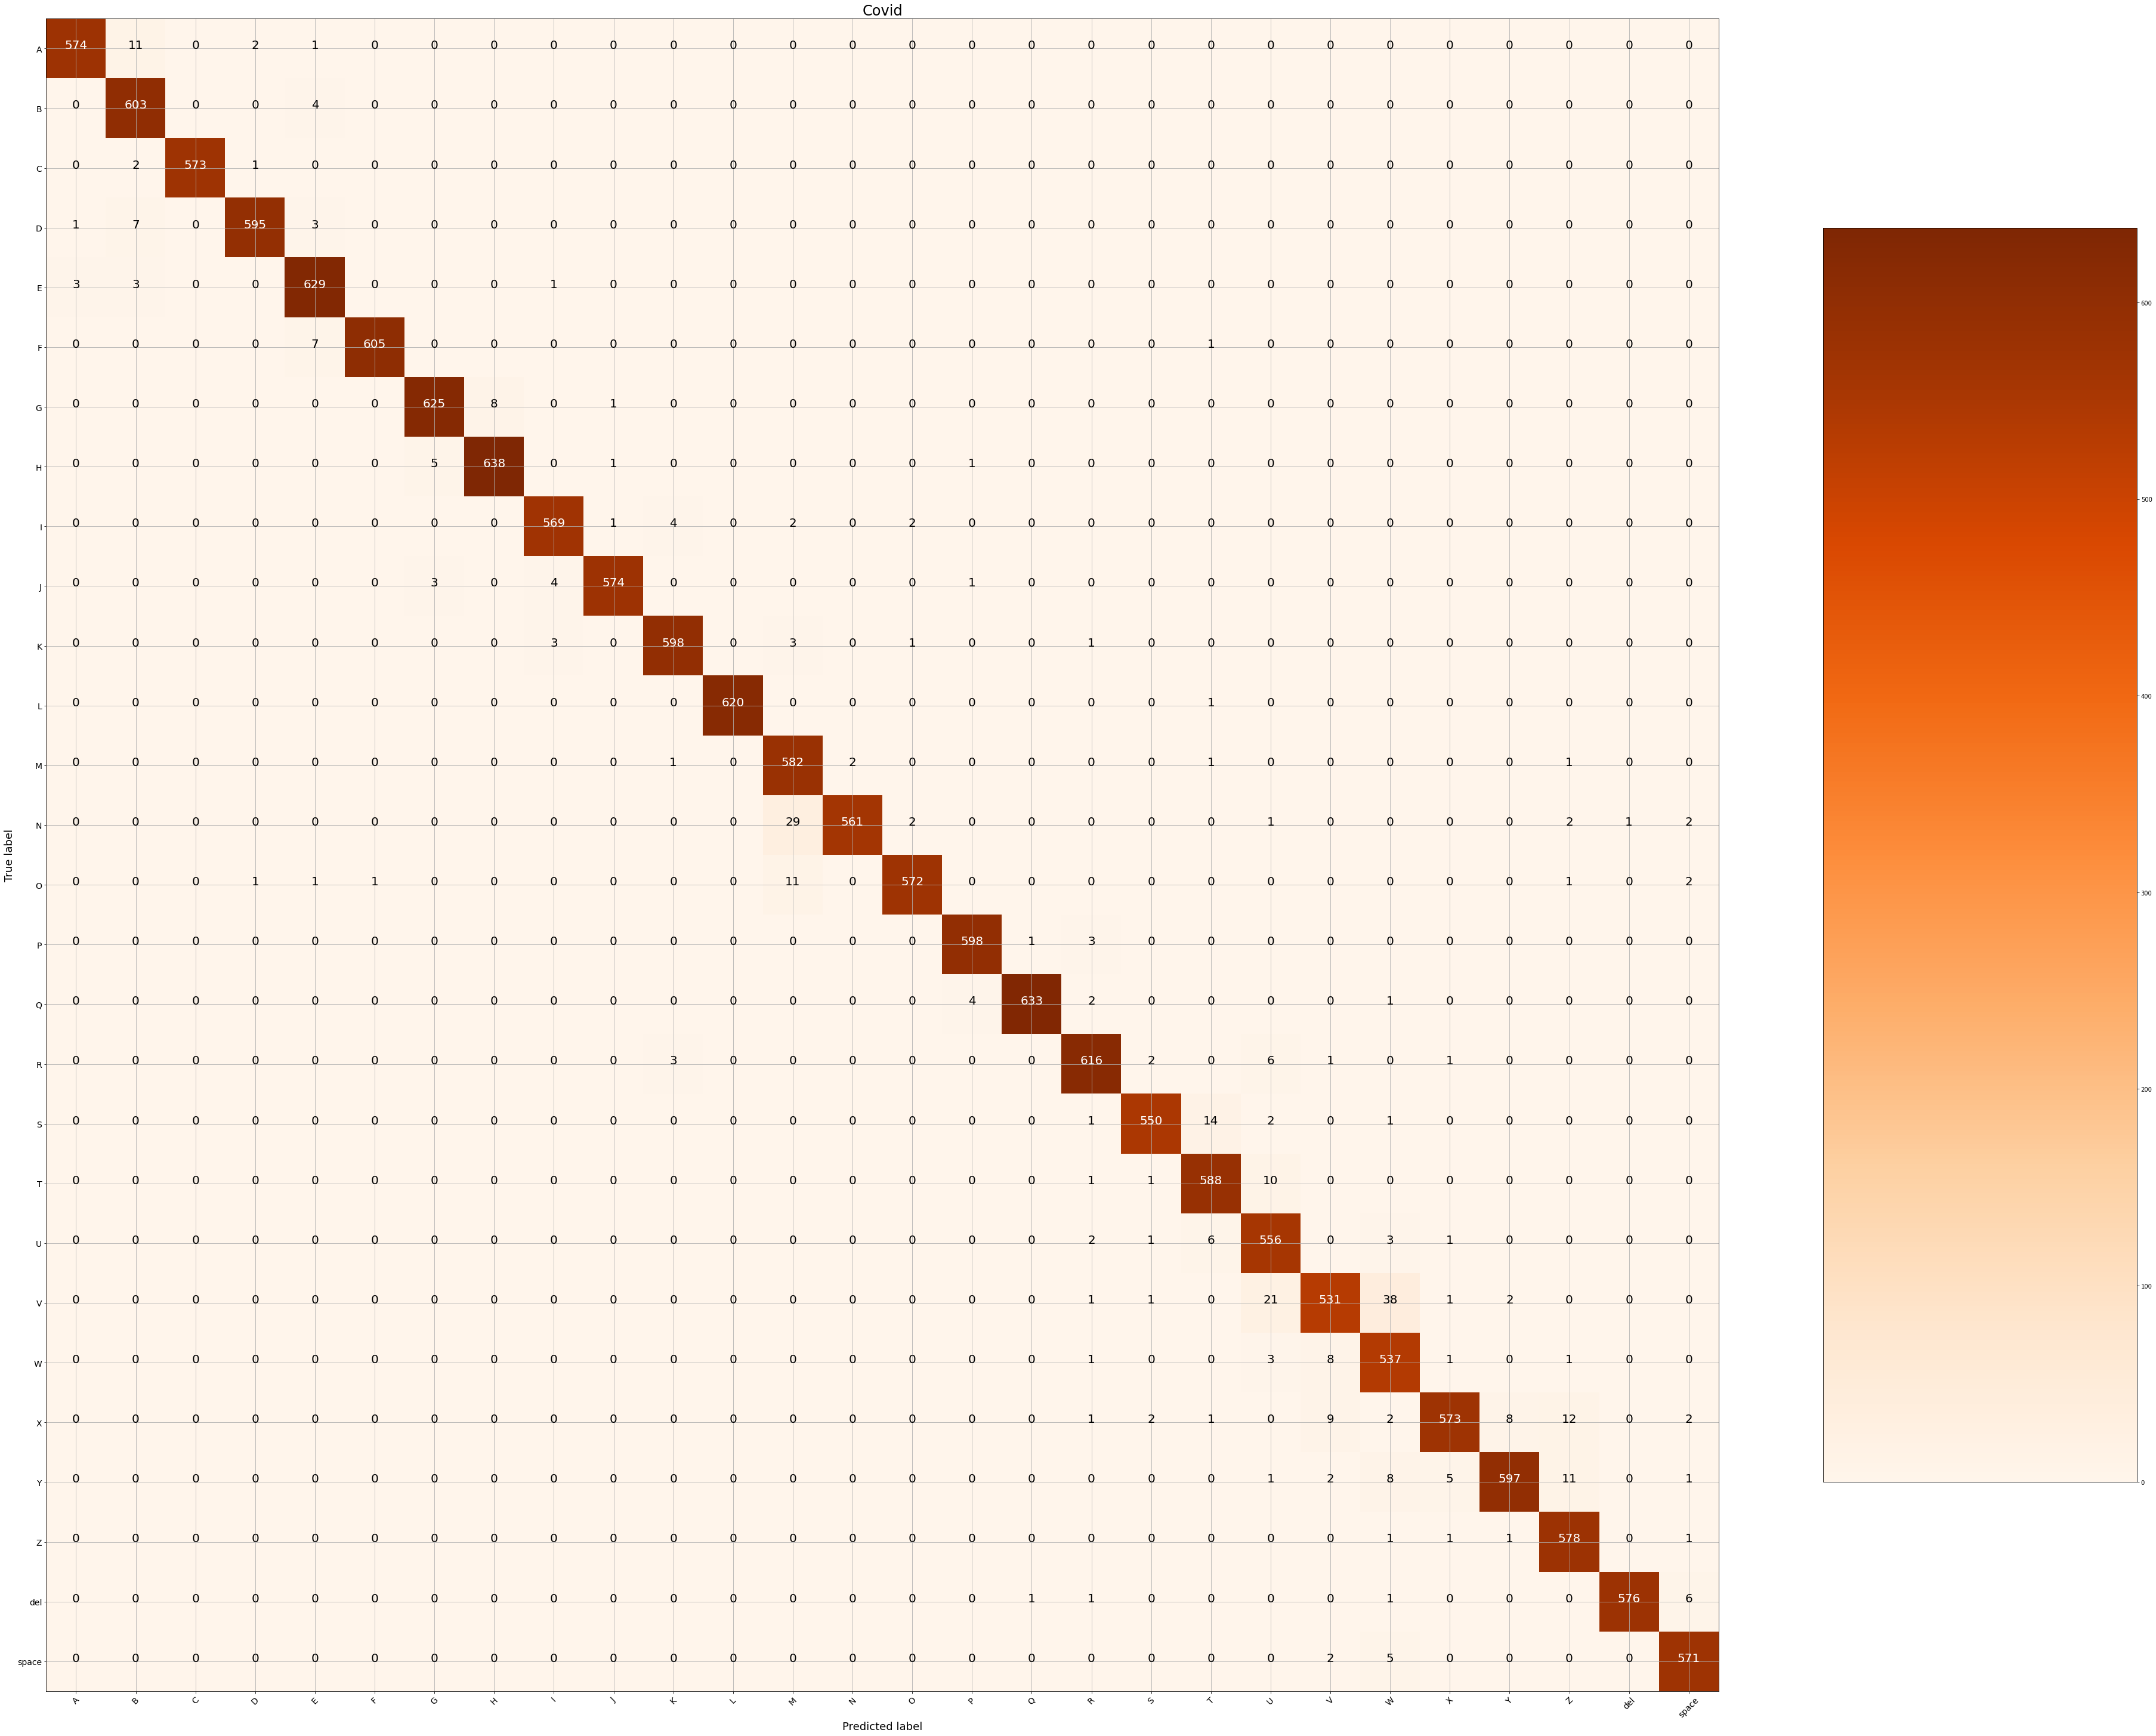

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(rounded_labels, predictions)
print(classification_report(rounded_labels,predictions))
plot_confusion_matrix(cm, classes = values,
                      title = 'Covid')